Project Intro
Customer churn is one of the most critical challenges faced by telecom companies, as acquiring new customers is significantly more expensive than retaining existing ones. Even a small increase in churn can lead to substantial revenue loss over time.

This project focuses on performing an end-to-end analysis of customer churn to understand the key factors that influence why customers leave a telecom service provider. Using customer demographic data, account information, service usage details, and payment behavior, the analysis aims to uncover patterns that differentiate churned customers from retained customers.

The goal of this project is not only to identify high-risk customer segments but also to translate analytical findings into practical, business-driven recommendations that can help improve customer retention, enhance service quality, and increase long-term customer loyalty.


In [2]:
import numpy as np;
import pandas as pd;
import seaborn as sns;
from pandas import Series,DataFrame
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/Customer Churn.csv");
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df["TotalCharges"].value_counts()

,count
TotalCharges,
,11
20.2,11
19.75,9
20.05,8
19.9,8
...,...
130.15,1
3211.9,1
7843.55,1


In [6]:
#replace banks with 0 and change the data type
df["TotalCharges"] = df["TotalCharges"].replace(" " , "0")
df["TotalCharges"] = df["TotalCharges"].astype("float")


In [7]:
def convert_values(value):
  if value == 1:
    return "yes"
  else:
    return "no"


df["SeniorCitizen"] =  df["SeniorCitizen"].apply(convert_values)

In [8]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


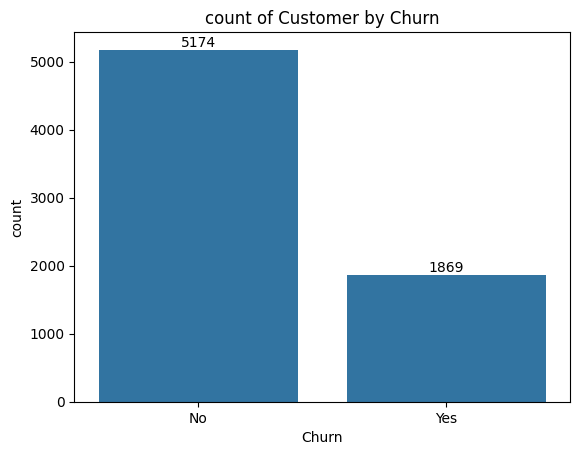

In [10]:
ax = sns.countplot( x = 'Churn' , data = df )
ax.bar_label( ax.containers[0] )
plt.title("count of Customer by Churn")
plt.show()

1869 Customers churned out

What type of customers are churning out and what company can do to improve retention rate ?

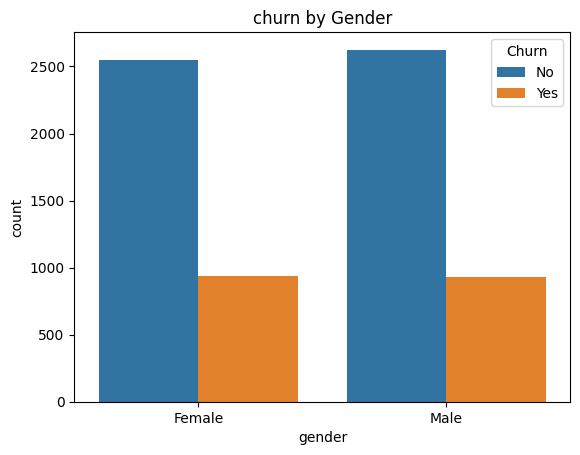

In [11]:
sns.countplot( x = "gender" , data = df , hue = "Churn"  )
plt.title("churn by Gender")
plt.show()

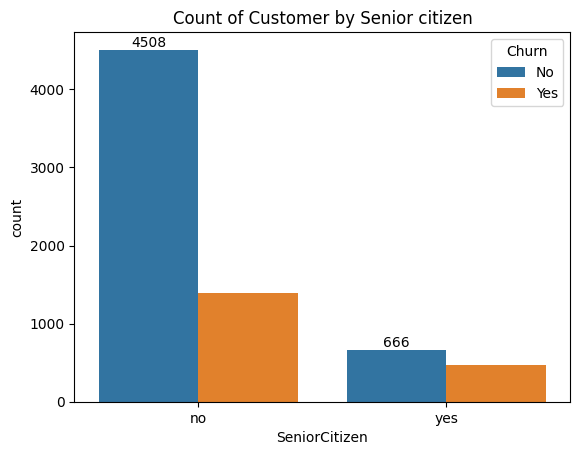

In [12]:
ax = sns.countplot( x = "SeniorCitizen" , data = df , hue = df["Churn"] )
ax.bar_label(ax.containers[0]  )
plt.title("Count of Customer by Senior citizen")
plt.show()

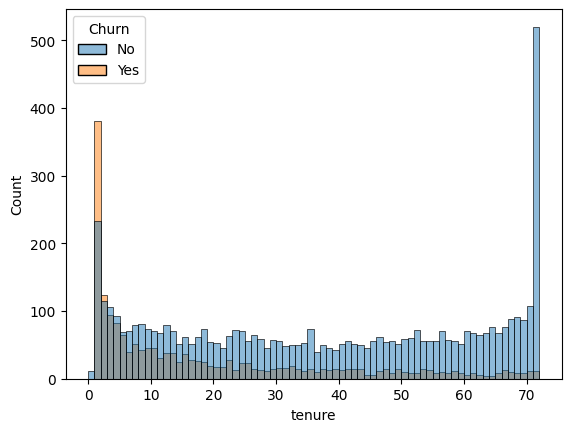

In [13]:
sns.histplot(  x =  "tenure"   ,  data = df , bins = 72  , hue = "Churn" )
plt.show()

In [14]:
df["Contract"].value_counts()

,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


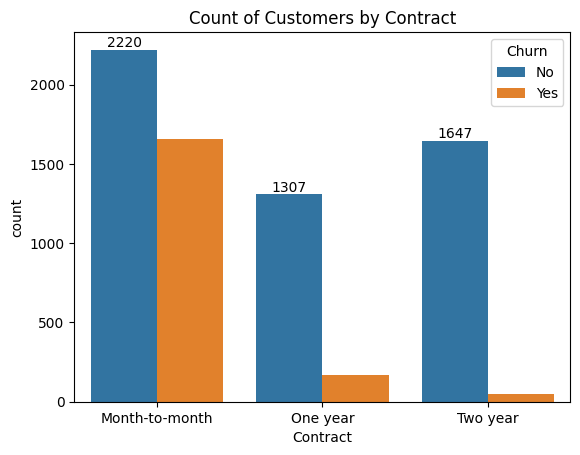

In [15]:
ax = sns.countplot( x = "Contract"  , data = df  , hue = "Churn" )
ax.bar_label( ax.containers[0] )
plt.title("Count of Customers by Contract")
plt.show()

In [16]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

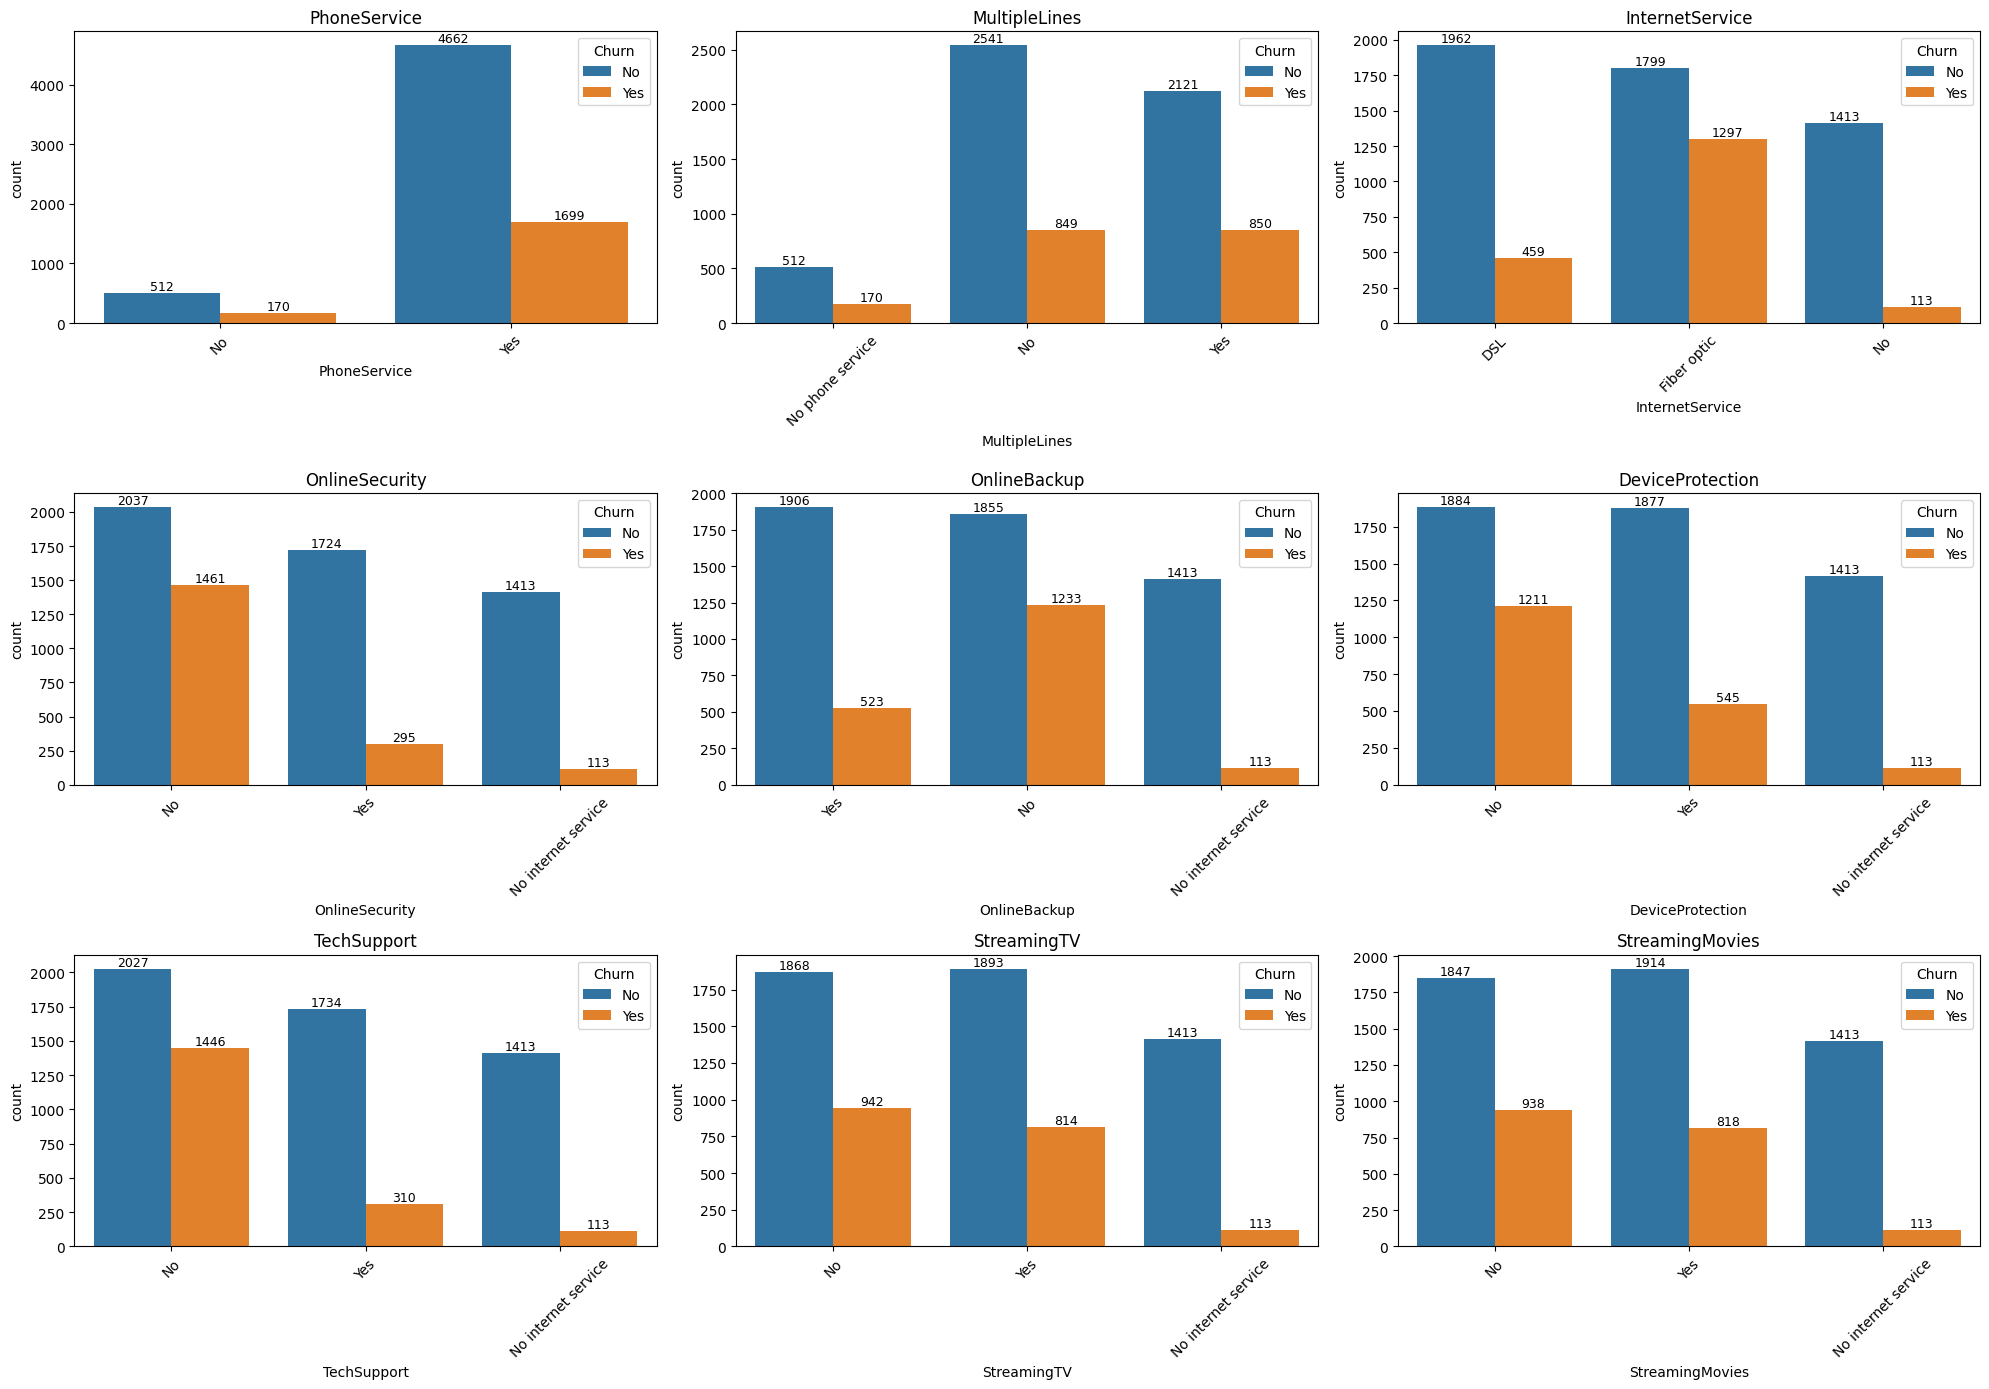

In [17]:
columns = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

plt.figure(figsize=(20, 14))

for i, col in enumerate(columns, 1):
    ax = plt.subplot(3, 3, i)
    sns.countplot(x=col, data=df, hue="Churn", ax=ax)
    ax.set_title(col)
    ax.tick_params(axis='x', rotation=45)

    # Add count labels on bars
    for container in ax.containers:
        ax.bar_label(container, label_type='edge', fontsize=9)

plt.tight_layout()
plt.show()

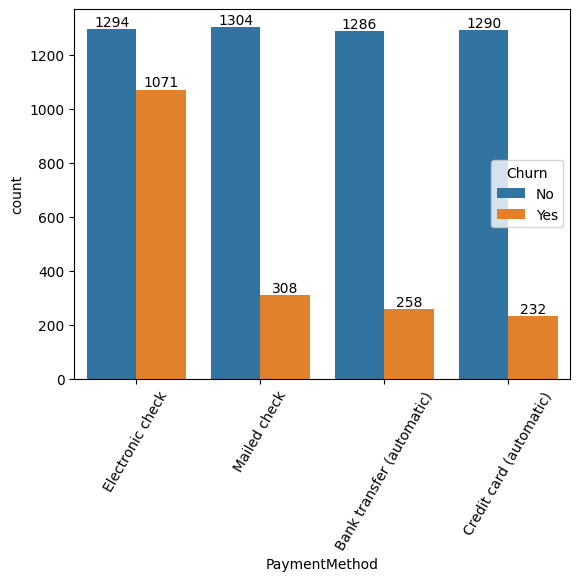

In [18]:
ax = sns.countplot( x = "PaymentMethod" , data = df , hue = "Churn" )
plt.xticks( rotation = 60 )
ax.bar_label( ax.containers[0] )
ax.bar_label( ax.containers[1] )
plt.show()

Final Recommedation
Based on the insights derived from the analysis, the following recommendations can help the company reduce churn and improve overall customer satisfaction:

Improve Early-Stage Customer Engagement
Customers with shorter tenure show significantly higher churn. Introducing structured onboarding programs, proactive follow-ups, and early support within the first few months can help build trust and reduce early exits.

Focus on Senior Citizen Retention
With a high churn rate among senior citizens, the company should offer simplified plans, clearer billing, and priority customer support tailored to this segment.

Encourage Long-Term Contracts
Month-to-month contract customers churn more frequently. Offering discounts, bundled benefits, or loyalty rewards for one-year and two-year contracts can increase commitment and reduce churn.

Bundle Value-Added Services
Customers without online security, backup, device protection, or tech support are more likely to churn. Bundling these services at a discounted rate can increase perceived value and improve retention.

Enhance Fiber Optic Service Experience
Higher churn among fiber optic users suggests possible service quality or support issues. Improving installation quality, network reliability, and proactive technical assistance can help retain these customers.

Promote Automatic Payment Methods
Customers using automatic bank transfers or credit card payments churn less. Encouraging auto-pay through incentives and simplified setup can reduce payment-related churn.